# Clustering Algorithms on Iris Dataset

This assignment focuses on implementing and understanding two clustering algorithms—**KMeans** and **Hierarchical Clustering**—using the classic **Iris dataset**.  
The goal is to explore how these unsupervised learning techniques group the data based on feature similarity, without using the labeled species.  
Visualizations are included to help interpret and compare the clustering outcomes.

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## KMeans Clustering

KMeans is a centroid-based clustering algorithm that partitions the data into K clusters. It works by:

    - Randomly initializing K centroids.
    - Assigning each point to the closest centroid.
    - Updating the centroids by computing the mean of points in each cluster.
    - Repeating steps 2 and 3 until convergence.

#### Why KMeans for Iris?

The Iris dataset has continuous numerical features, making it suitable for distance-based clustering like KMeans.
It’s known to naturally form clusters aligned with species, though we do not use labels in clustering.

G:\ML\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


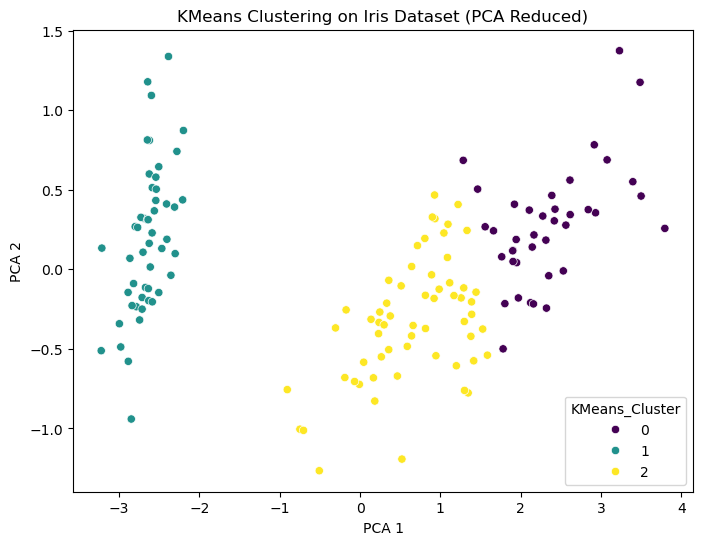

In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['KMeans_Cluster'] = kmeans.fit_predict(iris_df)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(iris_df.iloc[:, :-1])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=iris_df['KMeans_Cluster'], palette='viridis')
plt.title('KMeans Clustering on Iris Dataset (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


##  Hierarchical Clustering

Hierarchical Clustering creates a tree-like structure (dendrogram) of clusters. It can be:

    - Agglomerative (bottom-up): starts with individual points and merges them.
    - Divisive (top-down): starts with one cluster and splits them.

#### Why Hierarchical for Iris?
    - Doesn’t require pre-specifying the number of clusters.
    - Useful for visualizing cluster relationships through dendrograms.
    - Suitable for smaller datasets like Iris.

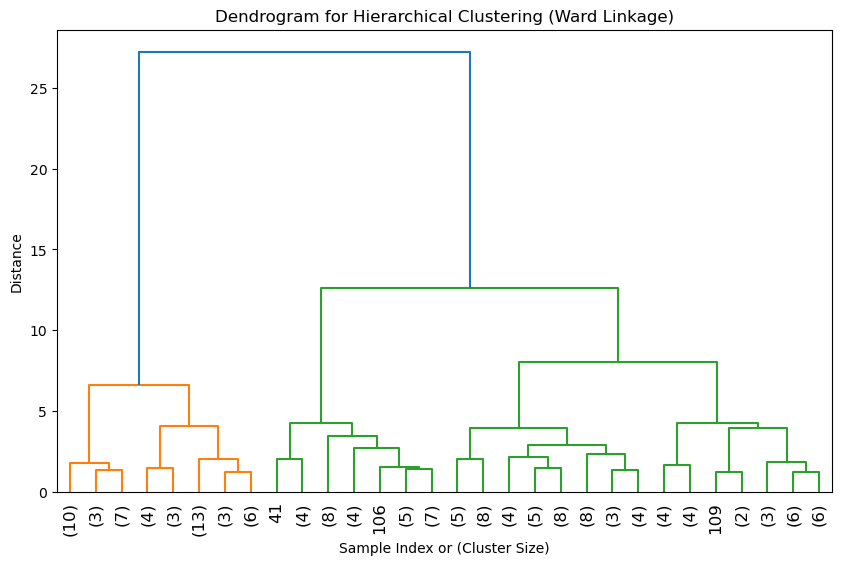

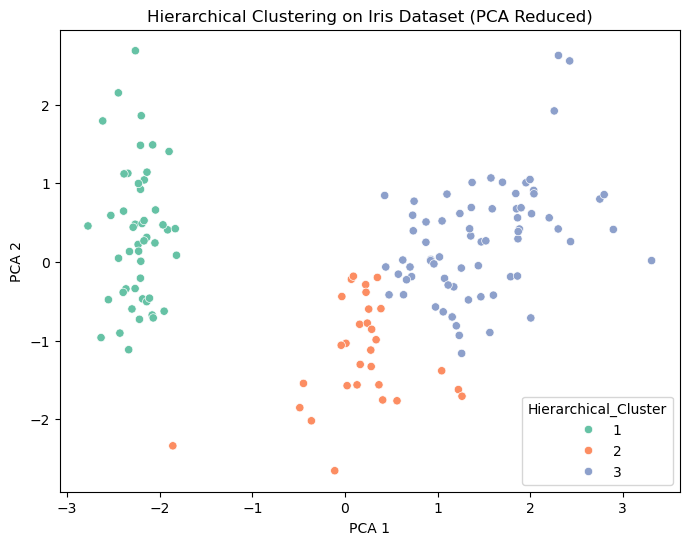

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris_df.iloc[:, :-1])

linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12.)
plt.title('Dendrogram for Hierarchical Clustering (Ward Linkage)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

iris_df['Hierarchical_Cluster'] = fcluster(linked, 3, criterion='maxclust')

pca_data = PCA(n_components=2).fit_transform(scaled_data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=iris_df['Hierarchical_Cluster'], palette='Set2')
plt.title('Hierarchical Clustering on Iris Dataset (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()
